## Tracking Covid-19 at U.S. Colleges and Universities

The New York Times is releasing counts of Covid-19 cases reported on college and university campuses in the United States. Since late July, they have been conducting a rolling survey of American colleges and universities — including every four-year public institution and every private college that competes in N.C.A.A. sports — to track the number of coronavirus cases reported among students and employees. The survey now includes more than 1,900 colleges. Starting in 2021 the number of cases in 2021 is also included. 

Colleges and universities that have reported zero cases will be listed with a zero for cases. We have excluded missing values.

#### This is an exercise meant to make you think of ways of grouping, aggregating, plotting, and presenting this data in a way that an audience would appreciate. 

### Data

Data can be found in the `colleges.csv` file. 
```
date,state,county,city,ipeds_id,college,cases,cases_2021,notes
2021-02-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,,
…
2021-02-26,Alabama,Jefferson,Birmingham,100663,University of Alabama at Birmingham,2856,570,"Total is known to include one or more cases from a medical school, medical center, teaching hospital, clinical setting or other academic program in health sciences."
```    
The fields have the following definitions:

- **date**: The date of the last update.
- **state**: The state where the college is located.
- **county**: The county where the college is located.
- **city**: The city where the college is located.
- **ipeds_id**: The Integrated Postsecondary Education Data System (IPEDS) ID number for the college.
- **college**: The name of the college or university.
- **cases**: The total number of reported Covid-19 cases among university students and employees in all fields, including those whose roles as doctors, nurses, pharmacists or medical students put them at higher risk of contracting the virus, since the beginning of the pandemic. 

In [2]:
%matplotlib inline

import pandas as pd; pd.set_option('max_columns', 6)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
colleges = pd.read_csv('colleges.csv')

In [4]:
colleges.shape

(1946, 7)

In [5]:
from IPython.core.display import display, HTML
display(HTML(colleges.head(10).to_html()))

,date,state,county,city,ipeds_id,college,cases
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220
5,2021-05-26,Alabama,Walker,Jasper,102429,Bevill State Community College,4
6,2021-05-26,Alabama,Jefferson,Birmingham,100937,Birmingham-Southern College,263
7,2021-05-26,Alabama,Limestone,Tanner,101514,Calhoun Community College,137
8,2021-05-26,Alabama,Tallapoosa,Alexander City,100760,Central Alabama Community College,49
9,2021-05-26,Alabama,Coffee,Enterprise,101143,Enterprise State Community College,76


Some ways of grouping the data would be by **state** or by **county**. When presenting, a plot is usually better that just arrays of numbers. 

In [6]:
colleges.groupby('_____').agg(['mean', 'std']).shape

(55, 2)

In [53]:
colleges.groupby('_____').agg({'cases':sum})

,cases
county,
Abbeville,0
Acadia,149
Ada,1642
Adair,749
Adams,948
...,...
Yellow Medicine,93
Yellowstone,246
Yolo,678


You are encouraged to make your own story with plots.

## Optional: add geospatial data and maps to your plots

People have written libraries to display geospatial data and nice visualizations of maps. *To run the following cells in your environment you will need to install the libraries `geoplot` and `geopandas` using conda or pip*. Feel free to try this example, although, for this class **it's entirely optional**. The example below is from the [geoplot](https://residentmario.github.io/geoplot/quickstart/quickstart.html) website.

In [2]:
#!conda install geoplot -c conda-forge
#!conda install geopandas

In [1]:
import geopandas as gpd
import geoplot as gplt

In [2]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


<AxesSubplot:>

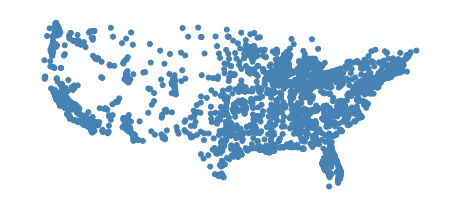

In [3]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities);

<AxesSubplot:>

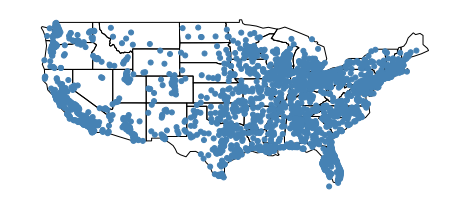

In [4]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax);

<GeoAxesSubplot:>

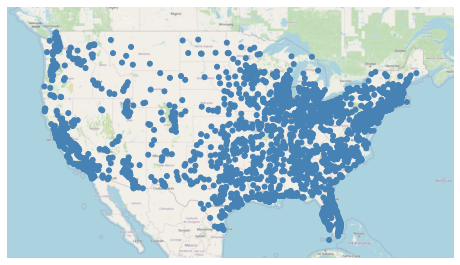

In [5]:
import geoplot.crs as gcrs
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)